<a href="https://colab.research.google.com/github/raulbenitez/PIB/blob/main/operadors_morfologics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Operadors morfològics

## Erosió i dilatació

### Exemple 1:

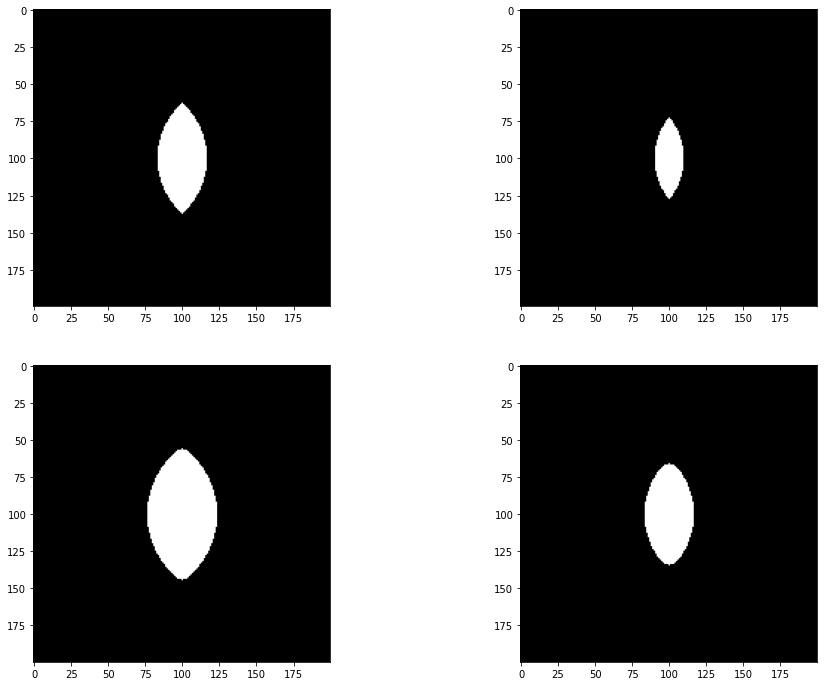

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

nrows, ncols = (200,200)
row, col = np.ogrid[:nrows, :ncols]
disk_diameter = 50

cnt_row1, cnt_col1 = nrows / 2, ncols / 3
outer_disk_mask1 = ((row - cnt_row1)**2 + (col - cnt_col1)**2 < (disk_diameter)**2)

cnt_row2, cnt_col2 = nrows / 2, 2*ncols / 3
outer_disk_mask2 = ((row - cnt_row2)**2 + (col - cnt_col2)**2 < (disk_diameter)**2)

# Intersection (logical AND): 
I_and = outer_disk_mask1 & outer_disk_mask2

from skimage.morphology import erosion, dilation
from skimage.morphology import disk

selem = disk(7)
eroded = erosion(I_and, selem)
dilated = dilation(I_and, selem)
eroded_dilated = dilation(eroded, selem)

fig = plt.figure(figsize=(16, 12))
plt.subplot(221),plt.imshow(I_and, cmap = 'gray')
plt.subplot(222),plt.imshow(eroded, cmap = 'gray')
plt.subplot(223),plt.imshow(dilated, cmap = 'gray')
plt.subplot(224),plt.imshow(eroded_dilated, cmap = 'gray')
plt.show()

### Exemple 2:

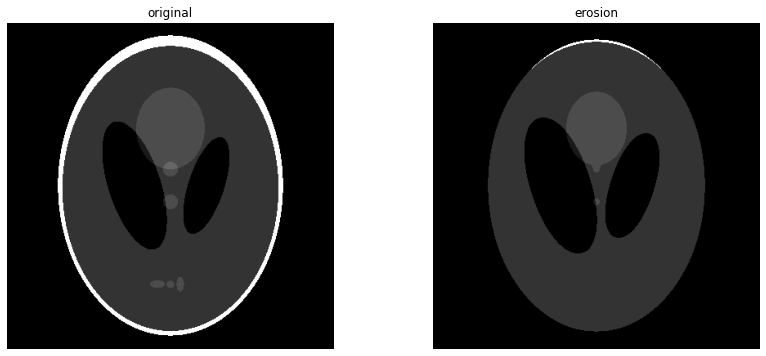

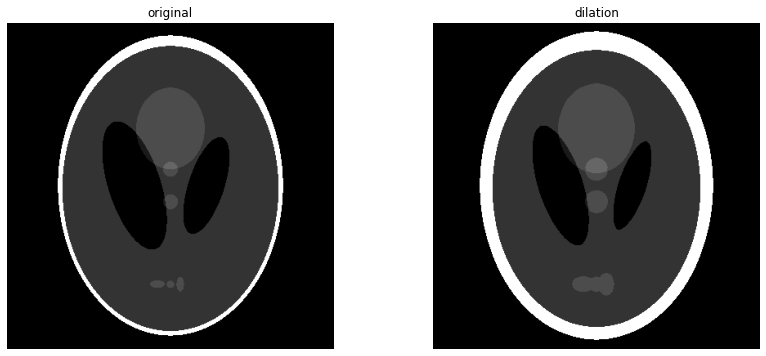

In [7]:
import skimage as sk
import matplotlib.pyplot as plt
from skimage.morphology import erosion, dilation
from skimage.morphology import disk


def plot_comparison(original, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 6), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')

orig_phantom = sk.data.shepp_logan_phantom()

selem = disk(5)
eroded = erosion(orig_phantom, selem)
plot_comparison(orig_phantom, eroded, 'erosion')

dilated = dilation(orig_phantom, selem)
plot_comparison(orig_phantom, dilated, 'dilation')


Proveu amb altres elements estructurants https://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.rectangle


## Apertura i tancament

- Apertura: erosió seguida d'una dilatació

- Tancament: dilatació seguida d'una erosió

### Exemple 1:

Generate synthetic binary blobs 
https://scikit-image.org/docs/dev/api/skimage.data.html#skimage.data.binary_blobs

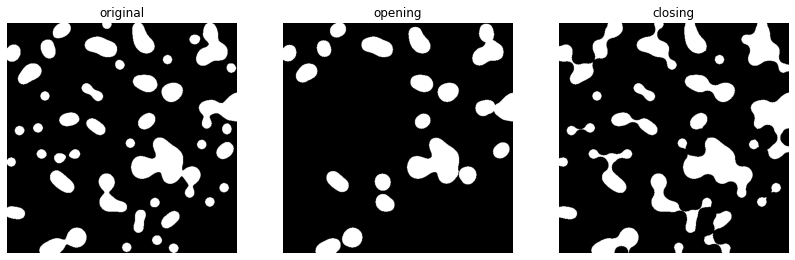

In [25]:
from skimage.morphology import binary_opening,binary_closing
from skimage.morphology import rectangle

def plot_comparison3(im1,im2,im3, title1,title2):

    fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(14, 6), sharex=True,
                                   sharey=True)
    ax1.imshow(im1, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(im2, cmap=plt.cm.gray)
    ax2.set_title(title1)
    ax2.axis('off')
    ax3.imshow(im3, cmap=plt.cm.gray)
    ax3.set_title(title2)
    ax3.axis('off')

blobs = sk.data.binary_blobs(blob_size_fraction=0.1,volume_fraction=0.2,seed=0)

selem = disk(15)
blobs_opening = binary_opening(blobs,selem)
blobs_closing = binary_closing(blobs,selem)

plot_comparison3(blobs,blobs_opening,blobs_closing,'opening','closing')

# Flood fill (omplir regions amb una llavor)

https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_floodfill.html#sphx-glr-auto-examples-segmentation-plot-floodfill-py

https://en.wikipedia.org/wiki/Flood_fill

### Exemple 1:

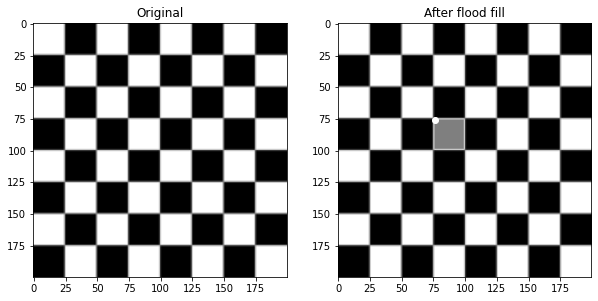

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, filters, color, morphology
from skimage.segmentation import flood, flood_fill


checkers = data.checkerboard()

# Fill a square near the middle with value 127, starting at index (76, 76)
filled_checkers = flood_fill(checkers, (76, 76), 127)

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))

ax[0].imshow(checkers, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(filled_checkers, cmap=plt.cm.gray)
ax[1].plot(76, 76, 'wo')  # seed point
ax[1].set_title('After flood fill')

plt.show()

### Exemple 2:

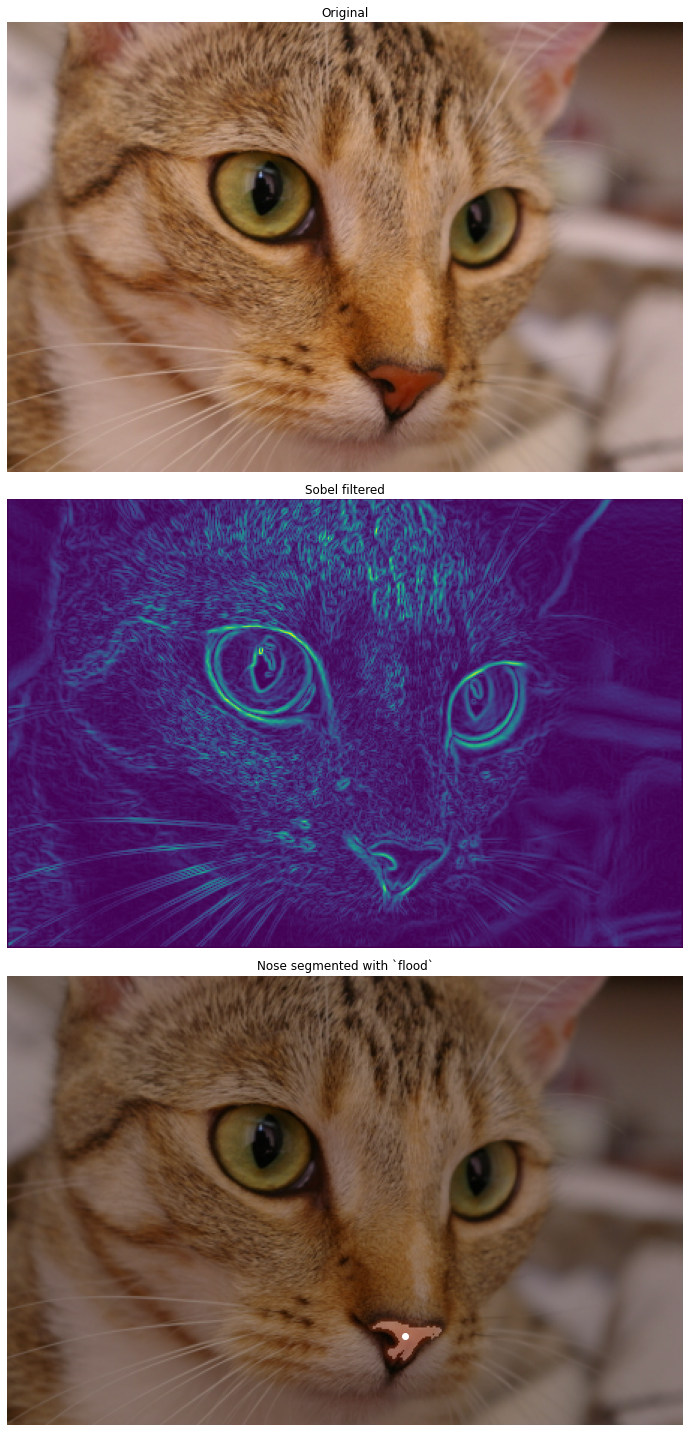

In [28]:
cat = data.chelsea()
cat_sobel = filters.sobel(cat[..., 0])
cat_nose = flood(cat_sobel, (240, 265), tolerance=0.03)

fig, ax = plt.subplots(nrows=3, figsize=(10, 20))

ax[0].imshow(cat)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].imshow(cat_sobel)
ax[1].set_title('Sobel filtered')
ax[1].axis('off')

ax[2].imshow(cat)
ax[2].imshow(cat_nose, cmap=plt.cm.gray, alpha=0.3)
ax[2].plot(265, 240, 'wo')  # seed point
ax[2].set_title('Nose segmented with `flood`')
ax[2].axis('off')

fig.tight_layout()
plt.show()

# Gràfics interactius amb plotly

Les llibreries plotly són una molt bona opció per visualitzar imatges de forma interactiva, permeten accedir a valors de píxel, etc. 

In [30]:
import plotly.express as px
import numpy as np
cat = data.chelsea()
fig = px.imshow(cat)
fig.show()